In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 [==============================] - 39s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [6]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [7]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [8]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [9]:
str(flowers_images_dict['roses'][0])


'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [10]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [11]:
img.shape


(240, 179, 3)

In [12]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [14]:
X = np.array(X)
y = np.array(y)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [17]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              





Epoch 1/30


86/86 [==============================] - 17s 167ms/step - loss: 1.2951 - accuracy: 0.4557
Epoch 2/30
86/86 [==============================] - 13s 156ms/step - loss: 0.9615 - accuracy: 0.6206
Epoch 3/30
86/86 [==============================] - 14s 160ms/step - loss: 0.7803 - accuracy: 0.7075
Epoch 4/30
86/86 [==============================] - 14s 161ms/step - loss: 0.5728 - accuracy: 0.7922
Epoch 5/30
86/86 [==============================] - 13s 155ms/step - loss: 0.3674 - accuracy: 0.8725
Epoch 6/30
86/86 [==============================] - 13s 157ms/step - loss: 0.2109 - accuracy: 0.9259
Epoch 7/30
86/86 [==============================] - 16s 185ms/step - loss: 0.1228 - accuracy: 0.9618
Epoch 8/30
86/86 [==============================] - 15s 169ms/step - loss: 0.0767 - accuracy: 0.9789
Epoch 9/30
86/86 [==============================] - 15s 175ms/step - loss: 0.0895 - accuracy: 0.9757
Epoch 10/30
86/86 [==============================] - 13s 156ms/step - loss: 0.0684 - a

In [18]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 2s 44ms/step - loss: 2.6345 - accuracy: 0.6471


[2.634488582611084, 0.6470588445663452]

In [19]:
predictions = model.predict(X_test_scaled)
predictions


29/29 [==============================] - 1s 43ms/step


array([[  0.6555157 ,  19.050846  ,   0.19938573, -20.286564  ,
         -6.910504  ],
       [  6.442831  ,   0.94465256,  -6.6384315 ,  -7.7976604 ,
          2.3036635 ],
       [ -2.1038318 ,  -1.3108013 ,  22.051344  , -13.1998825 ,
        -12.382746  ],
       ...,
       [  1.1862966 ,  -6.9405303 ,  -9.171467  ,   4.3227673 ,
          8.048697  ],
       [ -0.7652044 ,   7.0262923 ,  -3.176325  ,  -3.514821  ,
         -4.2964115 ],
       [ -1.0603623 , -11.832366  ,   1.9571065 ,   9.131578  ,
          4.7189856 ]], dtype=float32)

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


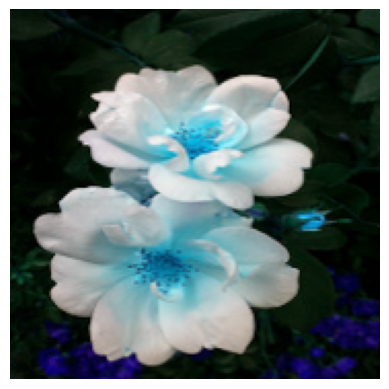

In [22]:
plt.axis('off')
plt.imshow(X[0])


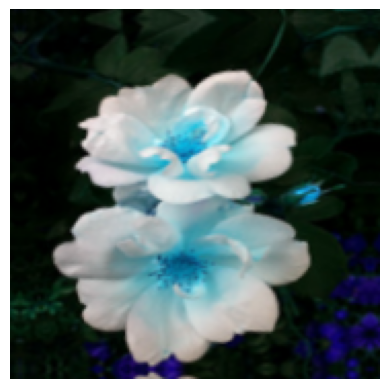

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [24]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    


Epoch 1/30
86/86 [==============================] - 21s 220ms/step - loss: 1.3824 - accuracy: 0.3903
Epoch 2/30
86/86 [==============================] - 21s 244ms/step - loss: 1.0434 - accuracy: 0.5865
Epoch 3/30
86/86 [==============================] - 21s 243ms/step - loss: 0.9660 - accuracy: 0.6152
Epoch 4/30
86/86 [==============================] - 20s 232ms/step - loss: 0.8877 - accuracy: 0.6512
Epoch 5/30
86/86 [==============================] - 20s 230ms/step - loss: 0.8400 - accuracy: 0.6766
Epoch 6/30
86/86 [==============================] - 19s 219ms/step - loss: 0.7998 - accuracy: 0.6944
Epoch 7/30
86/86 [==============================] - 19s 222ms/step - loss: 0.7291 - accuracy: 0.7227
Epoch 8/30
86/86 [==============================] - 19s 227ms/step - loss: 0.7105 - accuracy: 0.7260
Epoch 9/30
86/86 [==============================] - 23s 264ms/step - loss: 0.6746 - accuracy: 0.7427
Epoch 10/30
86/86 [==============================] - 25s 288ms/step - loss: 0.6498 - accura

In [25]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 2s 49ms/step - loss: 0.9941 - accuracy: 0.7375


[0.9940584301948547, 0.7374727725982666]